<a href="https://colab.research.google.com/github/Prasannark48/CapstoneProject--2-Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


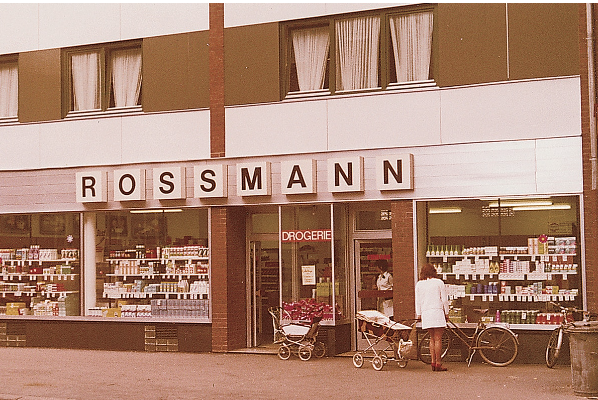

###Dirk Rossmann GmbH (Rossmann) is a private, German drug store chain founded in 1972 and is a key player in the European pharmacy market, with operations in healthcare and beauty retail industries. According to Bloomberg, Rossmann offers a wide range of products including baby and body care, hygiene, sun protection, cosmetics, dental hygiene, household, pets, hair care, perfume, fragrances, and food products.

###Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

###You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#mount the dataset to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
sales_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Projects/Retail sales prediction/Rossmann Stores Data.csv')
store = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Projects/Retail sales prediction/store.csv')


### Dataset First View

Once we get our hands on data for the first time, analyze the dimension of our data (how many rows vs columns?) and the data types (categorical data? numerical data? Discrete or continuous data?).

In [4]:
# Dataset First Look
#Two dataset we have have look here
sales_data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_data.shape # gives the number of rows and columns in dataset 1

(1017209, 9)

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
sales_data.isnull().sum() 

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Here , We can see no null values present in sales dataset.

In [8]:
#second dataset
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
store.shape # gives the number of rows and columns in dataset 2

(1115, 10)

In [10]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
#checking missing values/ Nan values
store.isnull().sum() 

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

We can see lot of values are missing or null in this store dataset.So, we need to replace these values with appropriate values.

#Data Cleaning

This is a crucial step to any data science project. Many machine learning algorithms don't cope well with missing (null) values or data that isn't in the right format. Here we perform two tasks:

#### Missing Values/Null Values

Text(0.5, 0, 'Promo2SinceYear Distribution Plot')

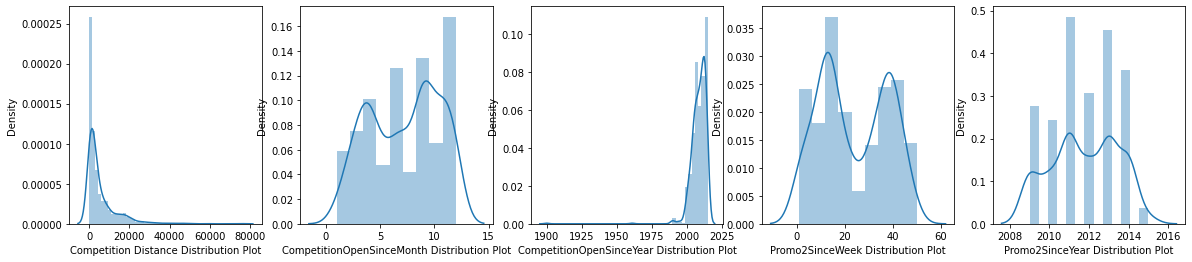

In [12]:
#visualization  plot of all the missing/null values
plt.figure(figsize = (20, 4))
plt.subplot(1,5,1)
sns.distplot(x=store['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

plt.subplot(1,5,2)
sns.distplot(x=store['CompetitionOpenSinceMonth'], hist = True)
plt.xlabel('CompetitionOpenSinceMonth Distribution Plot')

plt.subplot(1,5,3)
sns.distplot(x=store['CompetitionOpenSinceYear'], hist = True)
plt.xlabel('CompetitionOpenSinceYear Distribution Plot')

plt.subplot(1,5,4)
sns.distplot(x=store['Promo2SinceWeek'], hist = True)
plt.xlabel('Promo2SinceWeek Distribution Plot')

plt.subplot(1,5,5)
sns.distplot(x=store['Promo2SinceYear'], hist = True)
plt.xlabel('Promo2SinceYear Distribution Plot')



CompetitionDistance : Here, the distance in meteres to the nearest competitor store gives us the distances of the store opened. We can replace with median for this.

CompetitionOpenSinceMonth : Gives us idea about month where the nearest competitor was opened, we can replace it with mode, most occuring month.

CompetitionOpenSinceYear :year where the nearest competitor was opened, we can replace it with mode where most occuring year.

Promo2SinceWeek,Promo2SinceYear,PromoInterval :are NaN wherever Promo2 is 0 or False  They can be replaced with 0.     



In [13]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [14]:
store['CompetitionOpenSinceMonth'].mode()[0]

9.0

In [15]:
store['CompetitionOpenSinceYear'].mode()[0]

2013.0

In [16]:

# filling competition distance with the median value
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

# filling competition open since month and year with the  modes of those columns
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0], inplace = True)


# filling the nan values of promo2 related columns with 0
store['Promo2SinceWeek'].fillna(value=0,inplace=True)
store['Promo2SinceYear'].fillna(value=0,inplace=True)
store['PromoInterval'].fillna(value=0,inplace=True)
     

     

In [17]:
#checking any null values after replacing
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now, No null/missing values we found.

#### Duplicate Values

In [18]:
# Dataset Duplicate Value Count
sales_data.duplicated(subset = None, keep = 'first').value_counts

<bound method IndexOpsMixin.value_counts of 0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool>

In [19]:
store.duplicated(subset = None, keep = 'first').value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool>

In [20]:
len(sales_data[sales_data.duplicated()])

0

In [21]:
len(store[store.duplicated()])


0

So, No duplicate values we found from both the dataset.

Next we will merge both tables into one so we can more easily work with them. We will join the tables based on the shared Store column, which is a foreign key in the store table and a primary key in the stores_data table, so we'll validate the merge based on this many-to-one relationship.

In [22]:
## merging both the tables
final_df = pd.merge(sales_data, store , how='left', on="Store")

In [23]:
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


### Dataset Information

### Dataset Rows & Columns count

In [24]:
# Dataset Rows & Columns count
final_df.shape

(1017209, 18)

In [25]:
# Dataset Info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [26]:
# Dataset Columns
final_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [27]:
# Dataset Describe
final_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


### Variables Description 

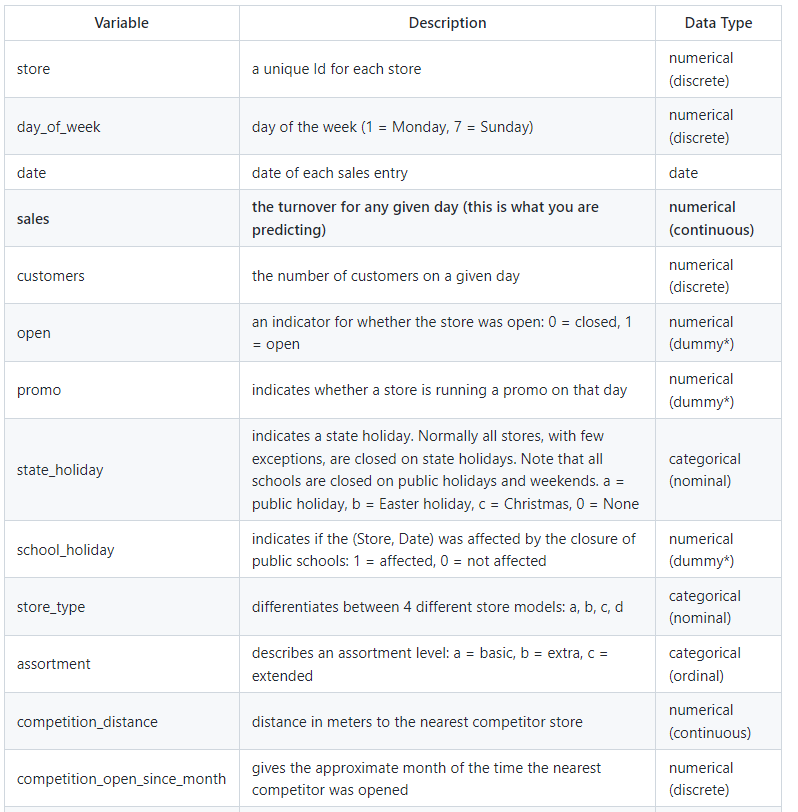
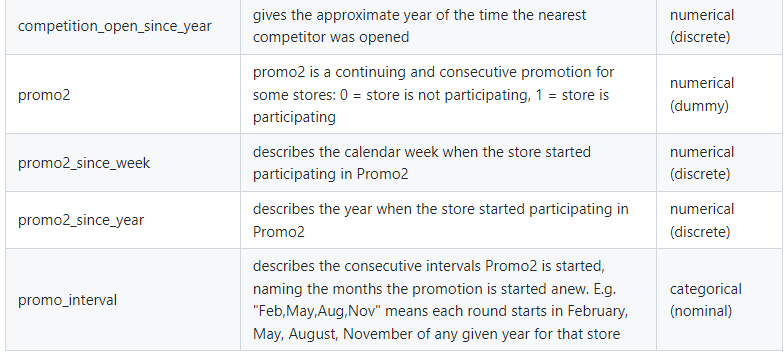

Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
final_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64

In [28]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
     

In [29]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'unique values for {col}: {final_df[col].unique()}')

unique values for DayOfWeek: [5 4 3 2 1 7 6]
unique values for Open: [1 0]
unique values for Promo: [1 0]
unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
unique values for SchoolHoliday: [1 0]
unique values for StoreType: ['c' 'a' 'd' 'b']
unique values for Assortment: ['a' 'c' 'b']
unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
unique values for Promo2: [0 1]
unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [59]:
final_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,0.0,0.0,0,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,1


In [30]:
#change into int type
final_df['StateHoliday'].replace({'0':0}, inplace=True)

In [31]:
final_df['Date'] = pd.to_datetime(final_df.Date, format='%Y-%m-%d')

In [32]:
# Changing the "Date" column into three "year","month","day" column
#creating features from the date
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['Day'] = final_df['Date'].dt.day
final_df['WeekOfYear'] = final_df['Date'].dt.weekofyear

In [33]:
# we can drop the Date column which is not necessary now
final_df.drop(columns=['Date'],axis=1).head()



,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,5263,555,1,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,6064,625,1,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,8314,821,1,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,13995,1498,1,1,0,1,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,4822,559,1,1,0,1,a,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31


## 3. ***Data Wrangling***

### Data Wrangling Code

### What all manipulations have you done and insights you found?

Answer Here.

In [ ]:
# Write your code to make your dataset analysis ready.

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**

An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

We will be Exploring continuous as well as categorical variables and their influence on our dependent variable-'Sales' further.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#Analysation of categorical variables

Our dependent variable is "Sales" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data type then we proceed with the numerical data type.

In [ ]:
categorical_variables

['DayOfWeek',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

#### Chart - 1
How 'open' Variable impacted the 'sales'?

[Text(0.5, 1.0, 'store percenatge ')]

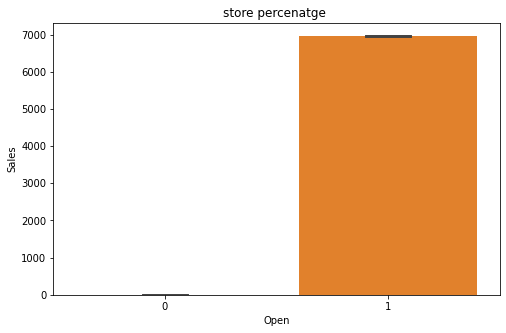

In [ ]:
# Chart - 1 visualization code
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(data=final_df,x='Open',y='Sales',ax=ax,capsize=.2)
ax.set(title='store percenatge ')

##### 1. Why did you pick the specific chart?

I used barplot comparing the open['1'] and closed['0'] with 'sales' . Because, It gives us the best comparison when we have only two unique values.

##### 2. What is/are the insight(s) found from the chart?

From the graph we get to know that 100% sales occurs only when the store is open. Generally we dont find any sales occurs during closure of the store.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, when the store was opened then we could see sales occurs with positive business impact.
Negative growth occurs only when the store was closed.

#### Chart - 2
What is the total number of sales over the weekdays?

[Text(0.5, 1.0, 'Count of sales against days of the week ')]

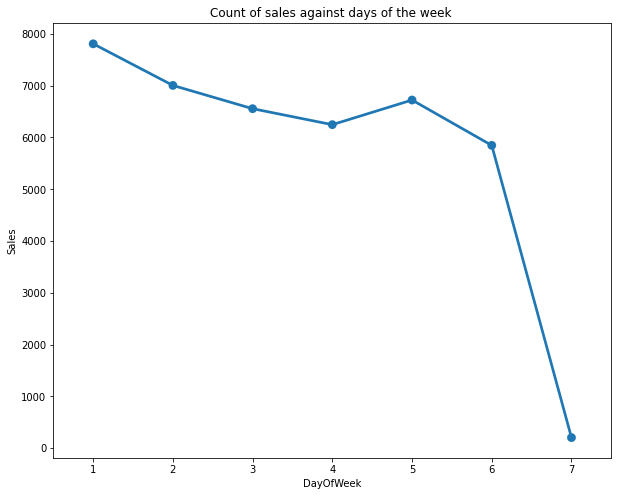

In [ ]:
# Chart - 2 visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=final_df,x='DayOfWeek',y='Sales',ax=ax)
ax.set(title='Count of sales against days of the week ')

##### 1. Why did you pick the specific chart?

This is point plot, Here we will obtain  which day the sales were highest and how drastically sales changes over other days.
So, this plot suites to analyze the number of sales occured on week days.

##### 2. What is/are the insight(s) found from the chart?

Here , We found that the highest number of sales occured on 'Monday' starting day of the week and the sales were slowly decreasing at the end of the week.
On 'Sunday' (7th day of the week), Sales were drastically fallen due to holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 The insights from the plot shows that during starting days of the week like Monday,Tuesday, wednesday, friday the sales got a positive growth.But due to holiday on sunday completely it leads to zero.It gives the negative growth.
So, Keeping store open on starting days of the week is must to grow the business. in peak level.

#### Chart - 3

##Which store type sales highest?

In [ ]:
#creating a function to make the value in percenatage wise
def label_function(val):
    return f'{val / 100 * len(final_df):.0f}\n{val:.0f}%'

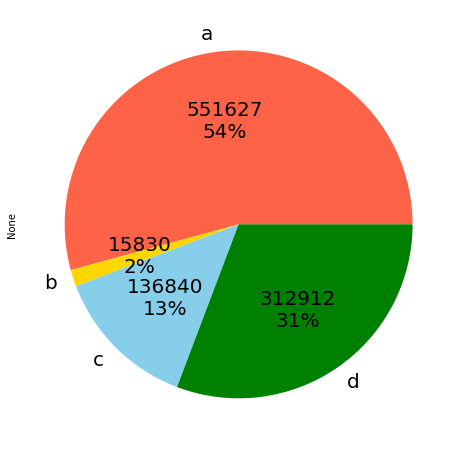

In [ ]:
## Chart - 3 visualization code
fig,ax=plt.subplots(figsize=(10,8))
final_df.groupby('StoreType').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue','green'])


plt.show()

##### 1. Why did you pick the specific chart?

There are only 4 types of stores in rossman dataset ie.store a, store b, store c, store d.
So, to analyze in percentage wise in pie chart looks better comparing with other plots.

##### 2. What is/are the insight(s) found from the chart?

From the pie chart we found that store type a saled large number of sales.
store type b was the least number of sales saled.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Store type 'a' given over half of the positive impact on sales and only 2% of sales saled by the store type 'b'giving very less positive growth.
If the store type b and c are opened for whole week and giving advertisements helps to grow store type b and c.

#### Chart - 4

##Relationship between sales and promotions

[Text(0.5, 1.0, 'store promo plot ')]

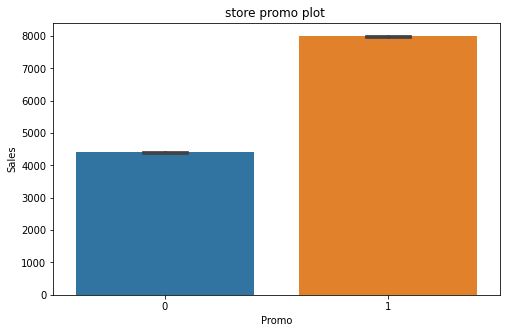

In [ ]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(data=final_df,x='Promo',y='Sales',ax=ax,capsize=.2)
ax.set(title='store promo plot ')


##### 1. Why did you pick the specific chart?

I used barplot comparing the Promo['1'] and Not promo['0'] with 'sales' . Because, It gives us the best comparison when we have only two unique values.

##### 2. What is/are the insight(s) found from the chart?

It could be seen that the Promo leads to more sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

I think with promo store making good business and positive impact on the sales.
While without promo we can see very less number of sales occured. So, We should increase the promo for all the store types.


#### Chart - 5

##What is the count of sales against state holidays?

[Text(0.5, 1.0, 'Count of sales against State holidays ')]

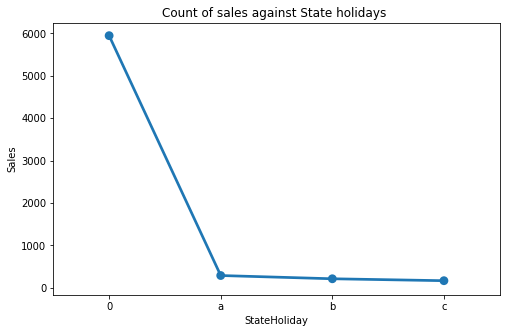

In [ ]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(8,5))
sns.pointplot(data=final_df,x='StateHoliday',y='Sales',ax=ax)
ax.set(title='Count of sales against State holidays ')

##### 1. Why did you pick the specific chart?

This plot gives us the correct sales value of the stateholidays. So, we can represent in line plot.

##### 2. What is/are the insight(s) found from the chart?

Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

During without any state holidays sales have good positive growth.
On christmas due to big festival on the germany most of the people will not buy any products in store. They are all in festival mood so this gives us the very less number of sales occured which shows a negative impact on sales.


#### Chart - 6

##What is the count of sales against state holidays?

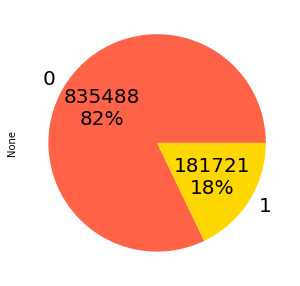

In [ ]:
# Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(8,5))
final_df.groupby('SchoolHoliday').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold'])

##### 1. Why did you pick the specific chart?

I used piechart comparing the SchoolHoliday['1'] and Not SchoolHoliday['0'] with 'sales' . Because, It gives us the best comparison when we have only two unique values.

##### 2. What is/are the insight(s) found from the chart?

There were 82% of sales occured if schoolholiday is not there. More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If holidays are not present for schools then sales would have increase. That's why we could see without schoolholiday impacted positively growth on sales.

#### Chart - 7

##Assortment v/s sales

[Text(0.5, 1.0, 'store percenatge ')]

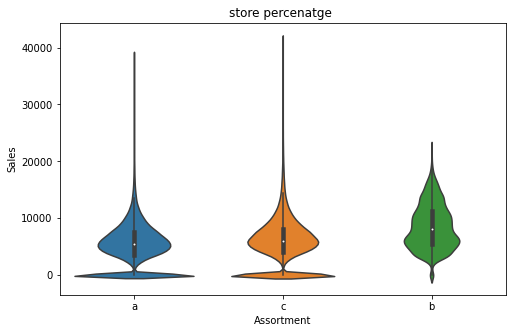

In [ ]:
# Chart - 7 visualization code
fig,ax=plt.subplots(figsize=(8,5))
sns.violinplot(data=final_df,x='Assortment',y='Sales',ax=ax)
ax.set(title='Assortment v/s sales ')


##### 1. Why did you pick the specific chart?

This plot gives us an idea about assortment types which we can easily find the highest number of sales.

##### 2. What is/are the insight(s) found from the chart?

Highest average sales were seen with Assortment levels-a which is 'basic'. We can see the drop of sales on 'b'(extra) assortment.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Basic assortment ('a') reached peak level of sales gives positive impact on sales. While the extra assortment 'b' induces less negative impact on sales.

#### Chart - 8

##Relationship between sales and CompetitionOpenSinceMonth

[Text(0.5, 1.0, 'store percenatge ')]

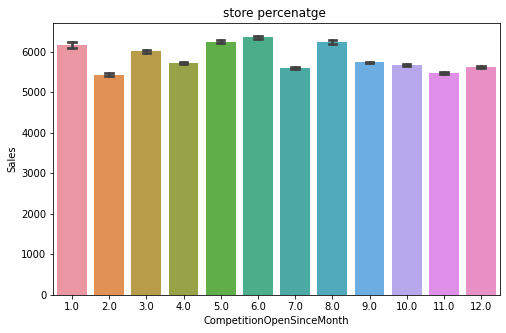

In [ ]:
# Chart - 8 visualization code
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(data=final_df,x='CompetitionOpenSinceMonth',y='Sales',ax=ax,capsize=.2)
ax.set(title='sales vs  CompetitionOpenSinceMonth ')

##### 2. What is/are the insight(s) found from the chart?

there are more sales data points for competitors which entered the competition on April, July, September;

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

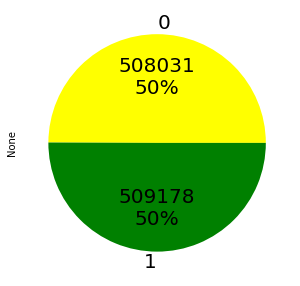

In [ ]:
# Chart - 9 visualization code
fig,ax=plt.subplots(figsize=(8,5))
final_df.groupby('Promo2').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['yellow', 'green'])

##### 1. Why did you pick the specific chart?

This plot gives us an idea about promotions which  we can easily find the highest number of sales occured in with promo or without promo.

##### 2. What is/are the insight(s) found from the chart?

We can able to see many number of sales occured With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

##In which promoyear sales sells more?

[Text(0.5, 1.0, 'store percenatge ')]

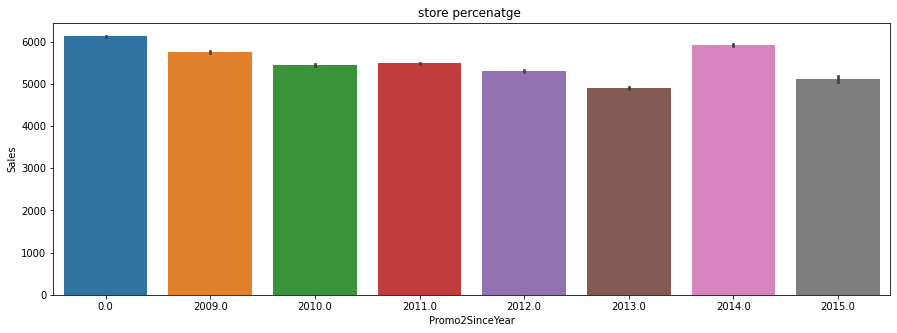

In [ ]:
# Chart - 10 visualization code
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=final_df,x='Promo2SinceYear',y='Sales',ax=ax)
ax.set(title='sales vs  Promo2SinceYear  ')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Stores doing consecutive promo sales in the beginning of the year sell more.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

During the initial consecutive years we could see positive impact on sales due to promotions.

#### Chart - 11

##In which months sales reached peak level?

[Text(0.5, 1.0, 'store percenatge ')]

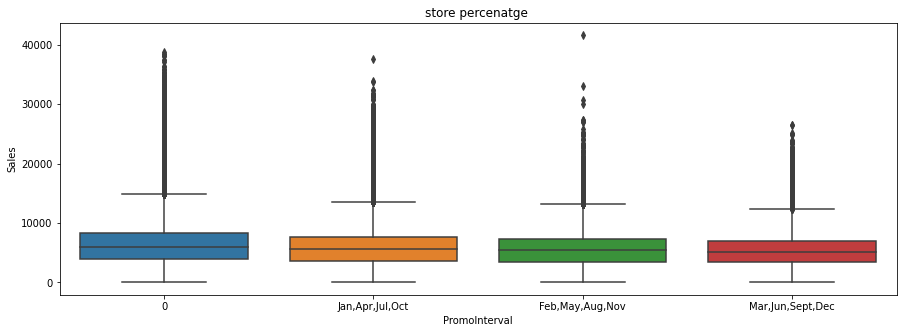

In [ ]:
# Chart - 11 visualization code
fig,ax=plt.subplots(figsize=(15,5))
sns.boxplot(data=final_df,x='PromoInterval',y='Sales',ax=ax)
ax.set(title='Monthwise sales ')

##### 1. Why did you pick the specific chart?

To analyze the interquartile range of all the promo intervals and to see outliers I used box plot to make difference among other plots.

##### 2. What is/are the insight(s) found from the chart?

We can see without promo also more number of sales occured but with promotions and all we could able to see sales generally increases. During the month of jan,Apr,Jul,Oct sales were in peak level.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Although sales are increasing without any promotions which will not impact negatively on sales. But, with promotions we could able to see positive growth on sales rapidly.

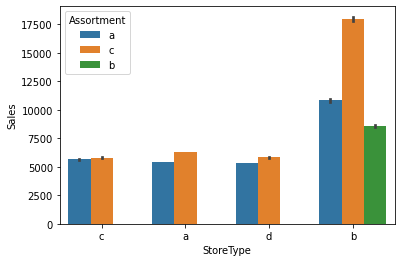

In [34]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=final_df["StoreType"],y=final_df['Sales'],hue=final_df["Assortment"])

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

***Relationship between Monthly sales over the years***

In [ ]:
#sales over the years
sales_df_2013 = final_df[final_df['Year']== 2013]
sales_df_2014 = final_df[final_df['Year']==2014]
sales_df_2015 = final_df[final_df['Year']== 2015]

#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

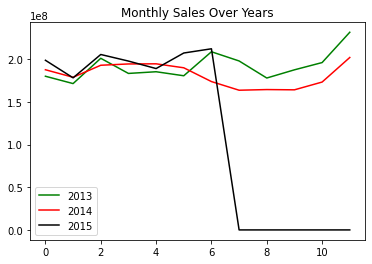

In [ ]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='green')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='red')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='black')
plt.title('Monthly Sales Over Years')
plt.legend()

Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

##Analyze of Numerical variables

Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

#### Chart - 12

###Analyze of Numerical variables distplots

In [35]:
numerical_features=['Store','Sales','Customers','CompetitionDistance']
numerical_features

['Store', 'Sales', 'Customers', 'CompetitionDistance']

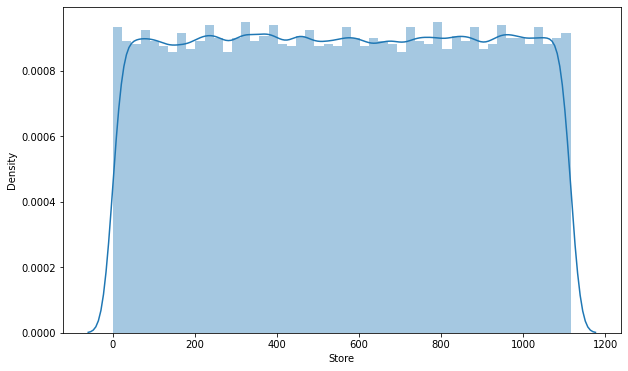

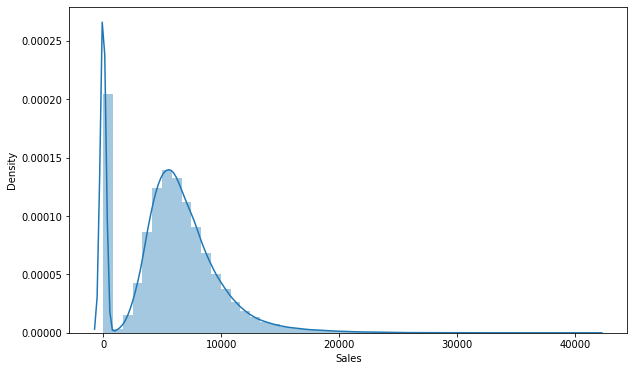

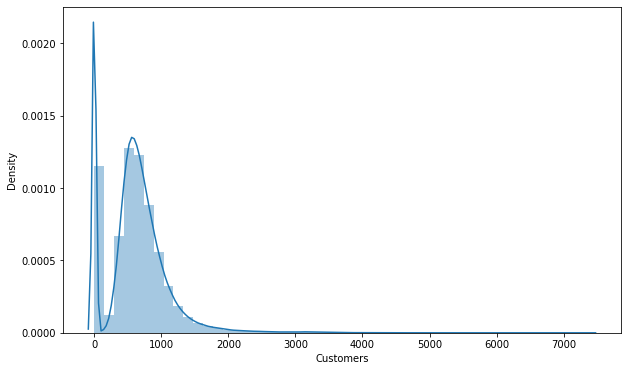

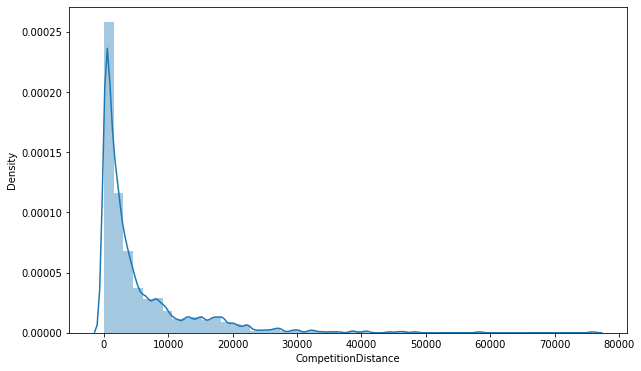

In [ ]:
# Chart - 12 visualization code
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=final_df[col])
  plt.xlabel(col)
plt.show()

#### Chart - 13

##Relationship between "Sales" and "Customers" 

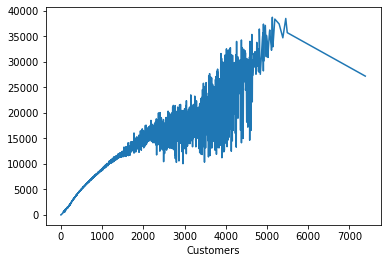

In [ ]:
# Chart - 13 visualization code
#print the plot to analyze the relationship between "Sales" and "Customers" 
final_df.groupby('Customers').mean()['Sales'].plot()

##Relationship between "Sales" and "CompetitionDistance" 

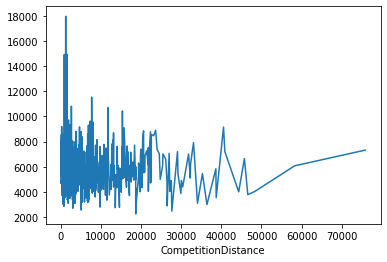

In [ ]:
#print the plot to analyze the relationship between "Sales" and "CompetitionDistance" 
final_df.groupby('CompetitionDistance').mean()['Sales'].plot()

##### 1. Why did you pick the specific chart?

This plot gives us an idea about how mean of the customers linearly related to the sales and we can clearly able to see the sales against competition distance.

##### 2. What is/are the insight(s) found from the chart?

Sales and Customer plot shows a direct positive relation between them.There is a linear relation can be obtained.

On the other hand, From the above  plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As customers increases the sales also linearly increases giving positive impact on the sales.

It can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.So, less compitiondistance gives positive impact on the sales.

#### Chart - 14 - Correlation Heatmap

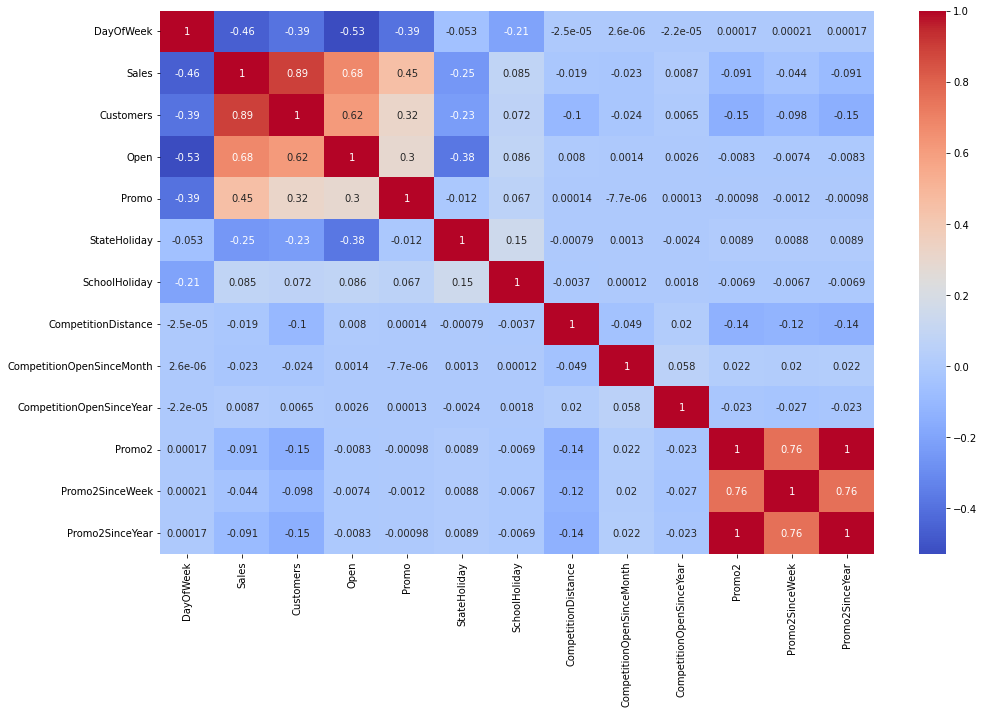

In [ ]:
# Correlation Heatmap visualization code
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store','Month', 'Year', 'WeekOfYear', 'Day']
corr_df = final_df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)


#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables.

##### 2. What is/are the insight(s) found from the chart?



1.   Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
2. State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
3. CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the plot earlier.
4. There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.




#### Chart - 15 - Pair Plot 

In [ ]:
# we need to take some sample amount of data and plot.Otherwise due to large dataset system crashes.
pair_df = final_df.sample(n=5000, random_state=1)

In [ ]:
# Pair Plot visualization code
plt.figure()
sns.pairplot(pair_df, kind='reg')
plt.title('Pair Plot', fontsize=20)

##### 1. Why did you pick the specific chart?

Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. 

##### 2. What is/are the insight(s) found from the chart?

This plot gives us complete insights of independent variables which impacts on dependent variable.like,

Sales and Customer plot shows a direct positive relation between them.There is a linear relation can be obtained.

On the other hand, From the above  plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

From the pie chart we found that store type a saled large number of sales.
store type b was the least number of sales saled.



#***Regression plot***

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

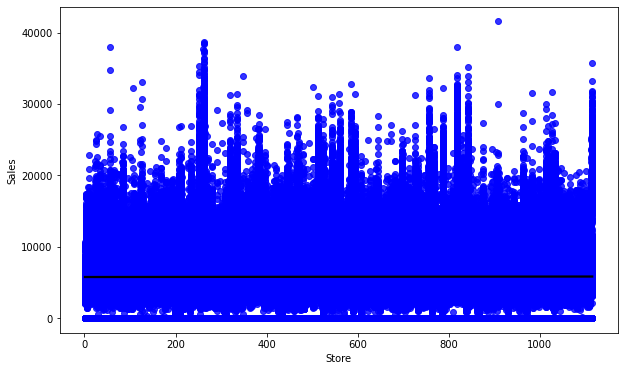

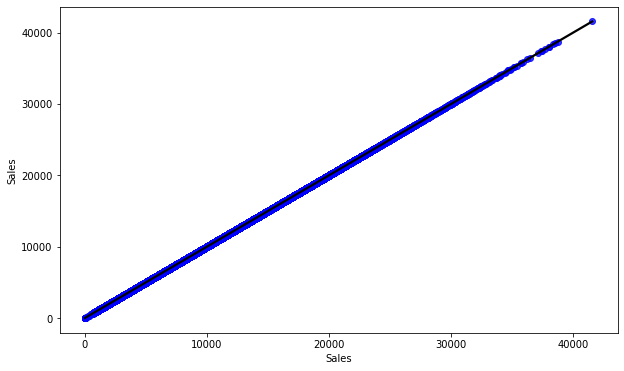

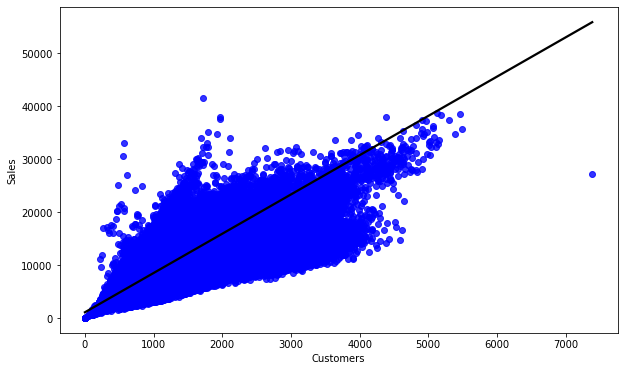

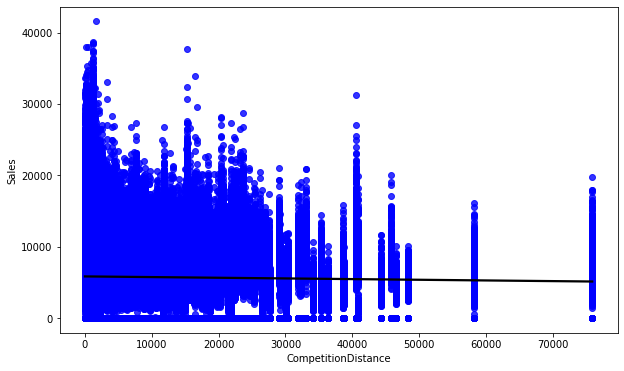

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=final_df[col],y=final_df['Sales'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"})

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

In [ ]:
final_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [ ]:
final_df['Customers']

0           555
1           625
2           821
3          1498
4           559
           ... 
1017204       0
1017205       0
1017206       0
1017207       0
1017208       0
Name: Customers, Length: 1017209, dtype: int64

In [ ]:
final_df['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [ ]:
final_df['Promo'].mean()

0.3815145166824124

In [ ]:
final_df['Promo'].std()

0.4857586048774201

In [ ]:
import math

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

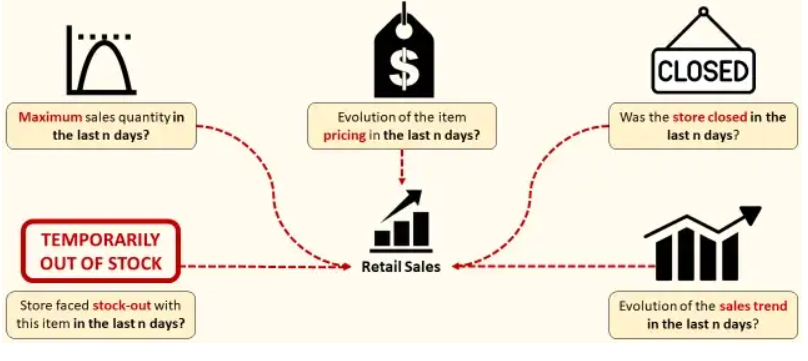

##Checking in OLS Model

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [61]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = final_df[[ 'SchoolHoliday','Month', 'Year', 'WeekOfYear', 'Day','Promo', 'Customers', 'CompetitionDistance']]
Y = final_df['Sales']
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31


In [ ]:
#add a constant column
X = sm.add_constant(X)
X

,const,SchoolHoliday,Month,Year,WeekOfYear,Day,Promo,Customers,CompetitionDistance
0,1.0,1,7,2015,31,31,1,555,1270.0
1,1.0,1,7,2015,31,31,1,625,570.0
2,1.0,1,7,2015,31,31,1,821,14130.0
3,1.0,1,7,2015,31,31,1,1498,620.0
4,1.0,1,7,2015,31,31,1,559,29910.0
...,...,...,...,...,...,...,...,...,...
1017204,1.0,1,1,2013,1,1,0,0,1900.0
1017205,1.0,1,1,2013,1,1,0,0,1880.0
1017206,1.0,1,1,2013,1,1,0,0,9260.0
1017207,1.0,1,1,2013,1,1,0,0,870.0


In [ ]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 6.586e+05
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:26:21   Log-Likelihood:            -8.9149e+06
No. Observations:             1017209   AIC:                         1.783e+07
Df Residuals:                 1017200   BIC:                         1.783e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.694e+05   4132.835    -65.195      0.000   -2.78e+05   -2.61e+05
SchoolHoliday         103.5332      4.082     25.364      0.000      95.533     111.534
Month                  41.3810      1.890     21.897      0.000      37.677      45.085
Year                  133.9626      2.052     65.288      0.000     129.941     137.984
WeekOfYear             -3.0533      0.434     -7.039      0.000      -3.903      -2.203
Day                     5.4741      0.181     30.205      0.000       5.119       5.829
Promo                1481.1211      3.372    439.194      0.000    1474.511    1487.731
Customers               6.9714      0.004   1983.395      0.000       6.965       6.978
CompetitionDistance     0.0335      0.000    167.284      0.000       0.033       0.034
==============================================================================
Omnibus:                   201214.452   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4908320.247
Skew:                          -0.331   Prob(JB):                         0.00
Kurtosis:                      13.741   Cond. No.                     2.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. R sqauare and Adj Square are near to each other. 83% of variance in the Sales is explained by the model.

2. For F statistic , P value is less than 0.05 for 5% levelof significance.so, we can reject the null hypothesis.

4. Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.

5. The condition number is large, 2.58e+07. This might indicate that there are strong multicollinearity or other numerical problems

6. Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 2. We can say that there exists a positive auto correlation among the variables.

#Normalise Sales column data

The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data

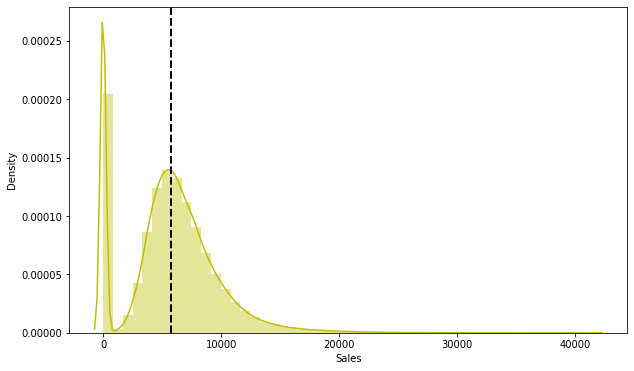

In [51]:
#Distribution plot of Sales
plt.figure(figsize=(10,6))
plt.xlabel('Sales')
plt.ylabel('Density')
ax=sns.distplot(final_df['Sales'],hist=True ,color="y")
ax.axvline(final_df['Sales'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(final_df['Sales'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that Sales has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

0 is raised because most of the times store was closed.

### 2. Handling Outliers

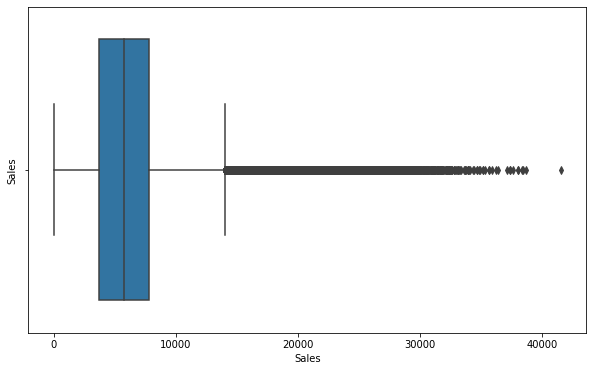

In [52]:
# Handling Outliers & Outlier treatments
#Boxplot of Sales to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Sales')
sns.boxplot(x=final_df['Sales'])
plt.show()

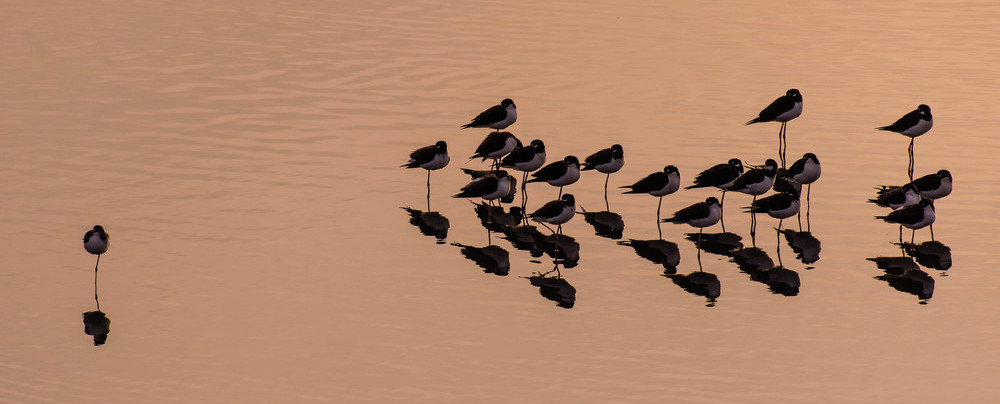

The above boxplot shows that we have detected outliers in Sales  column.

In [ ]:
Q1 = final_df.quantile(0.25)
Q3 = final_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Store                         558.0
DayOfWeek                       4.0
Sales                        4129.0
Customers                     432.0
Open                            0.0
Promo                           1.0
SchoolHoliday                   0.0
CompetitionDistance          6170.0
CompetitionOpenSinceMonth       3.0
CompetitionOpenSinceYear        5.0
Promo2                          1.0
Promo2SinceWeek                22.0
Promo2SinceYear              2012.0
dtype: float64


In [ ]:
upper_limit = Q1 + 1.5 * IQR
lower_limit = Q3 - 1.5 * IQR

In [62]:
#no of observations for closed stores with 0 sales
(final_df[final_df.Open == 0]).shape
     

(172817, 22)

In [63]:
#since the stores closed had 0 sale value; removing the irrelevant part
final_df_out = final_df[final_df.Open != 0]
final_df_out.drop('Open', axis=1, inplace=True)
     

##### What all outlier treatment techniques have you used and why did you use those techniques?

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.

In [64]:
final_df_out.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data of the sales column is transformed using sqaure root method because the dataset of the sales are rightly skewed  distributed.

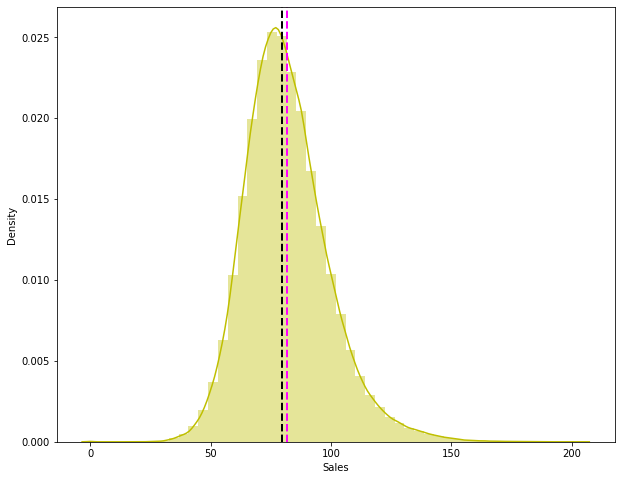

In [ ]:
#Applying square root to Sales to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Sales')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(final_df_out['Sales']), color="y")
ax.axvline(np.sqrt(final_df_out['Sales']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(final_df_out['Sales']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed 'Sales' , here we get almost normal distribution.

### 3. Categorical Encoding

In [ ]:
final_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  float64

##Outlier Detection
Outliers and Z score:
In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

Total number of Outliers present in the Sales column are 9731.


[Text(0.5, 1.0, 'Outliers Distribution')]

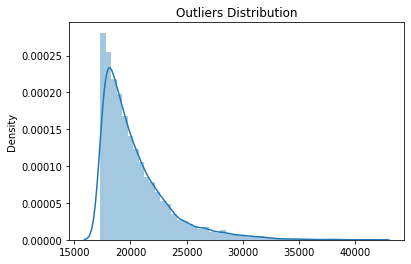

In [55]:
#code to seperate outliers
mean_sales = np.mean(final_df['Sales']) #mean
sd_sales = np.std(final_df['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in final_df['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')
     

The data points with sales value higher than 25000 are very low and hence they an be considered as outliers.

In [65]:

#percentage of sales greater than 25000
sales_outliers = final_df.loc[final_df['Sales']> 25000]
percentage_of_outliers = (len(sales_outliers)/len(final_df))*100
#print
print(f'The percentage of observations of sales greater than 25000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 25000 are 0.07451762617121949


In [66]:
sales_outliers.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
261,262,5,2015-07-31,25774,3669,1,1,0,1,b,...,5.0,2013.0,0,0.0,0.0,0,2015,7,31,31
755,756,5,2015-07-31,25280,2901,1,1,0,1,a,...,9.0,2013.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
1113,1114,5,2015-07-31,27508,3745,1,1,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2015,7,31,31
3343,1114,3,2015-07-29,25840,3545,1,1,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2015,7,29,31
4458,1114,2,2015-07-28,25518,3456,1,1,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2015,7,28,31
5301,842,1,2015-07-27,27881,1493,1,1,0,0,d,...,11.0,2007.0,0,0.0,0.0,0,2015,7,27,31
5573,1114,1,2015-07-27,26720,3468,1,1,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2015,7,27,31
5836,262,7,2015-07-26,32547,4783,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,7,26,30
13641,262,7,2015-07-19,31665,4691,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,7,19,29
18953,1114,3,2015-07-15,25750,3584,1,1,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2015,7,15,29


Some interesting insights can be drawn from these outliers dataframe:

First thing that comes to notice is the DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B.
All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.
It can be well established that the outliers are showing this behavior for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behavior seems fair.

In [56]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262 and  explore store type and Day Of week
#let's verify in the full dataset
final_df.loc[(final_df['DayOfWeek']==7) & (final_df['StoreType']=='b')]
     

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
5659,85,7,2015-07-26,11421,1606,1,0,0,0,b,...,10.0,2011.0,0,0.0,0.0,0,2015,7,26,30
5833,259,7,2015-07-26,15998,2857,1,0,0,0,b,...,9.0,2013.0,0,0.0,0.0,0,2015,7,26,30
5836,262,7,2015-07-26,32547,4783,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,7,26,30
5848,274,7,2015-07-26,7750,1608,1,0,0,0,b,...,9.0,2013.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,26,30
5909,335,7,2015-07-26,7988,1509,1,0,0,0,b,...,9.0,2013.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,26,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011252,733,7,2013-01-06,11226,2584,1,0,0,0,b,...,10.0,1999.0,0,0.0,0.0,0,2013,1,6,1
1011288,769,7,2013-01-06,6995,1764,1,0,0,0,b,...,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,6,1
1011467,948,7,2013-01-06,6024,1402,1,0,a,0,b,...,9.0,2013.0,0,0.0,0.0,0,2013,1,6,1
1011600,1081,7,2013-01-06,0,0,0,0,0,0,b,...,3.0,2006.0,0,0.0,0.0,0,2013,1,6,1


This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.

Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.

##Create the dummy variables

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [67]:
#Assign all catagoriacla features to a variable
categorical_features=list(final_df_out.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

##one hot encoding

A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [68]:
final_df_out

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1,b,a,...,9.0,2006.0,0,0.0,0.0,0,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,0,a,1,b,b,...,10.0,1999.0,0,0.0,0.0,0,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,0,a,1,b,b,...,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,0,a,1,b,b,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,1


In [69]:
categorical_features

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [70]:
#creat a copy
final_df_out_copy = final_df_out

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    final_df_out_copy = one_hot_encoding(final_df_out_copy, col)
final_df_out_copy.head()     

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,1270.0,9.0,2008.0,...,0,1,0,1,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,570.0,11.0,2007.0,...,0,0,0,1,0,0,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,14130.0,12.0,2006.0,...,0,0,0,1,0,0,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,620.0,9.0,2009.0,...,0,1,0,0,0,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,29910.0,4.0,2015.0,...,0,0,0,1,0,0,1,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction


#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

##**Model Training**

##Train Test split for regression

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [42]:
final_df_out_copy.tail(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
1017190,1097,2,2013-01-01,5961,1405,0,1,720.0,3.0,2002.0,...,1,0,0,0,1,0,1,0,0,0


In [43]:
final_df_out_copy.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,1270.0,9.0,2008.0,...,0,1,0,1,0,0,1,0,0,0


In [44]:
### split data to original state
# training dataset
train = final_df_out_copy[final_df_out_copy['Date'] < '2015-06-19']
# validation dataset
test = final_df_out_copy[final_df_out_copy['Date'] >= '2015-06-19']

In [ ]:
# check dates
print( 'Train min date:{}'.format(train['Date'].min()))
print( 'Train max date:{}'.format(train['Date'].max()))
print( '\ntest min date:{}'.format(test['Date'].min()))
print( 'test max date:{}'.format(test['Date'].max()))

Train min date:2013-01-01 00:00:00
Train max date:2015-06-18 00:00:00

test min date:2015-06-19 00:00:00
test max date:2015-07-31 00:00:00


In [ ]:
# check dataset shape
print('train data shape: {} // test data shape: {}'.format(train.shape, test.shape))

train data shape: (802996, 126) // test data shape: (41396, 126)


In [72]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Assign the value in X and Y
X = final_df_out_copy.drop(columns=['Sales','Date'], axis=1)
y = np.sqrt(final_df_out_copy['Sales'])

In [46]:
y.head()

0     72.546537
1     77.871689
2     91.181138
3    118.300465
4     69.440622
Name: Sales, dtype: float64

In [73]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(633294, 30)
(211098, 30)


The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

MSE formula = (1/n) * Σ(actual – forecast)2 Where:

n = number of items,

Σ = summation notation,

Actual = original or observed y-value,

Forecast = y-value from regression.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

Formula for R-Squared
R2=1−Unexplained VariationTotal Variation 
​

R 2 =1−  (Unexplained Variation​ / Total Variation)

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.​

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

##LINEAR REGRESSION

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line.

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

y_pred=β0+β1x 

where
β0 and β1 
are intercept and slope respectively.

In case of multiple features the formula translates into:

y_pred=β0+β1x1+β2x2+β3x3+..... 

where x_1,x_2,x_3 are the features values and
β0,β1,β2..... 
are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

Let us now implement our first model. We will be using LinearRegression from scikit library.

In [74]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [75]:
# ML Model - 1 Implementation
#check the score
reg.score(X_train, y_train)
# Fit the Algorithm

# Predict on the model

0.8059731013774152

In [76]:
#check the coefficeint
reg.coef_

array([-7.80868655e-04, -2.76515222e-01,  4.01362541e-02,  7.46902434e+00,
        2.59128346e-01,  1.32425068e-04, -4.01806943e-02, -2.55548429e-02,
        2.22707421e+02,  5.37129362e-02, -2.58303492e-01,  1.13861162e+00,
        2.44240488e-01,  4.92379853e-03, -7.59670231e-03, -2.09880575e+00,
       -3.81920676e+00, -6.43990020e+00,  1.23579127e+01,  3.35446092e+00,
       -1.65964558e+01,  3.08489154e+00,  1.01571034e+01,  5.73644628e+00,
       -1.35821344e+01,  7.84568810e+00, -2.22707421e+02,  7.43812898e+01,
        7.49648805e+01,  7.33612504e+01])

In [77]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.27672797273433
RMSE : 7.699138131812829
MAE : 5.8838789055412475
R2 : 0.8059731013774152
Adjusted R2 : 0.805945523371575


Looks like our r2 score value is 0.82 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 55.386470790478434
RMSE : 7.442208730644313
MAE : 5.6967634350222225
R2 : 0.8182337032427611
Adjusted R2 : 0.8181268695683199


The r2_score for the test set is 0.82. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

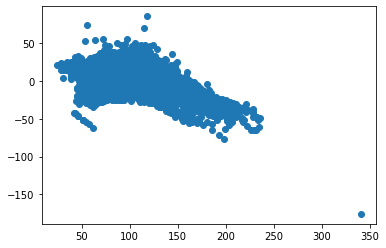

In [ ]:
# Visualizing evaluation Metric Score chart
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

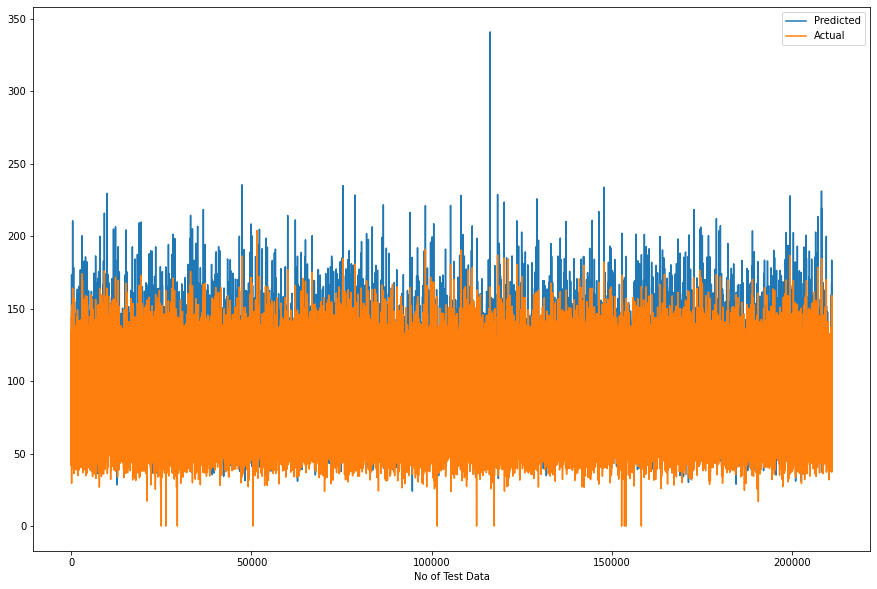

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

##LASSO REGRESSION

In [79]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7201516677220511 0.718288026427315


In [80]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 86.06520097304903
RMSE : 9.277133230316844
MAE : 6.890637924105057
R2 : 0.718288026427315
Adjusted R2 : 0.718247985306689


Looks like our r2 score value is 0.71 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 85.57140448361005
RMSE : 9.250481310916209
MAE : 6.865907319544308
R2 : 0.7191733454160524
Adjusted R2 : 0.7190082887255356


The r2_score for the test set is 0.71. This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

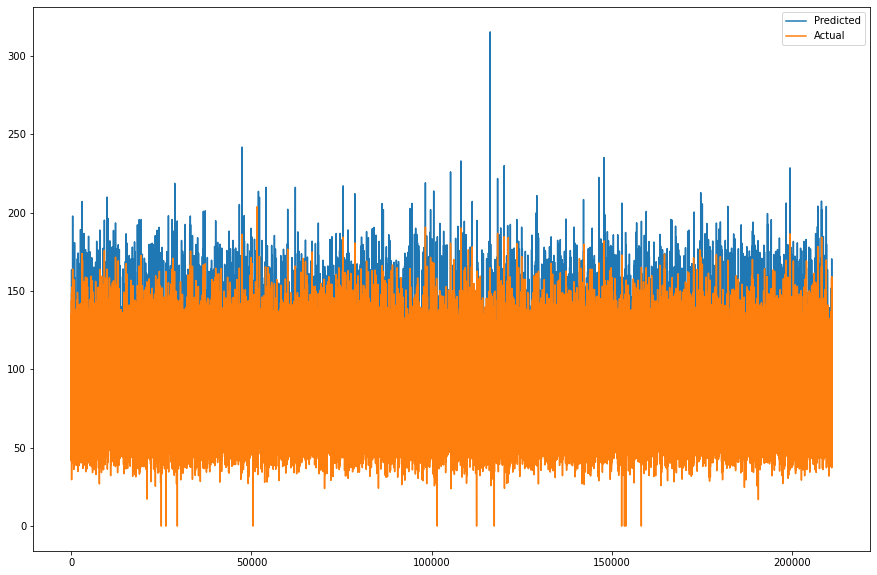

In [ ]:
# Visualizing evaluation Metric Score chart
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

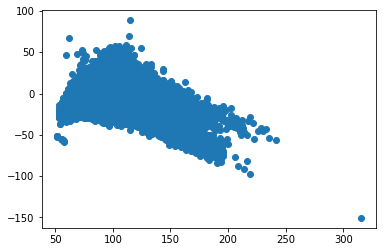

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

##RIDGE REGRESSION

In [ ]:
# ML Model - 3 Implementation
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
# Fit the Algorithm
ridge.fit(X_train,y_train)



Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.8216784126313261

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 54.478633123338874
RMSE : 7.38096424075736
MAE : 5.655761036852459
R2 : 0.8216784126313261
Adjusted R2 : 0.821572757859977


Looks like our r2 score value is 0.82 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.13326847190204
RMSE : 7.357531411547085
MAE : 5.6393811358821
R2 : 0.8223464394630724
Adjusted R2 : 0.8222411804947396


The r2_score for the test set is 0.82. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

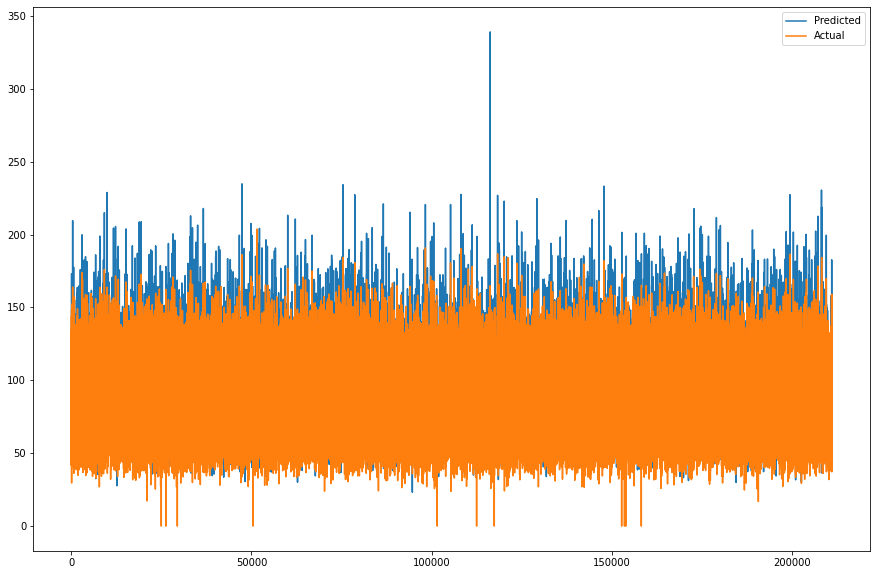

In [ ]:
# Visualizing evaluation Metric Score chart
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


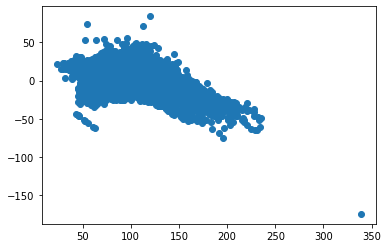

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

##ELASTIC NET REGRESSION

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.7814284343042065

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 66.77531483676498
RMSE : 8.171616415175457
MAE : 6.123787993880666
R2 : 0.7814284343042065
Adjusted R2 : 0.7812989315943115


Looks like our r2 score value is 0.78 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 66.24463621054008
RMSE : 8.139080796413074
MAE : 6.100406188799089
R2 : 0.7825995765361103
Adjusted R2 : 0.7824707677229361


The r2_score for the test set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

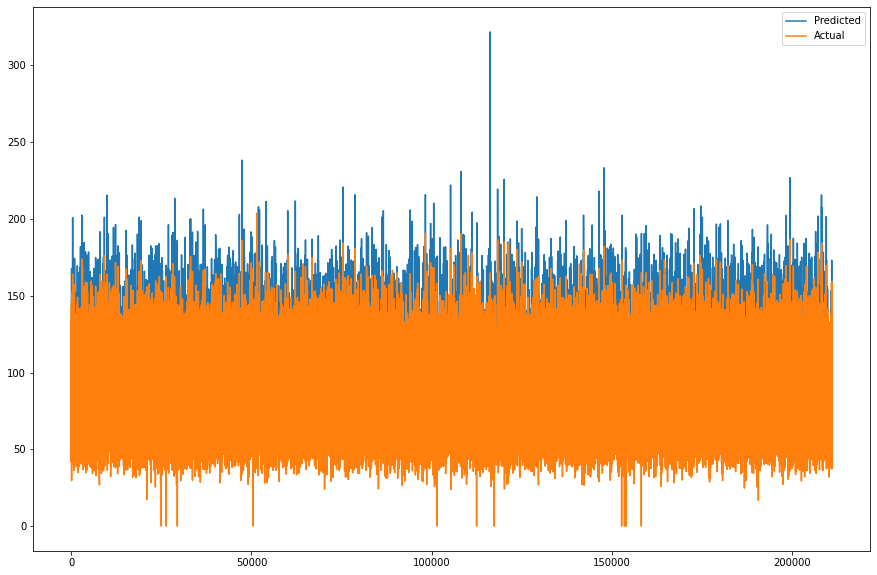

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

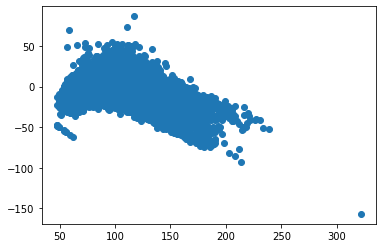

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

##DECISION TREE

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(max_leaf_nodes=100, random_state=42)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=42)

In [ ]:
#check the score
decision_regressor.score(X_train, y_train)

0.8534250504924248

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8534250504924248
MSE : 44.7797881183391
RMSE : 6.691770178236779
MAE : 5.208217452004753
R2 : 0.8534250504924248
Adjusted R2 : 0.8533382054670733


Looks like our r2 score value is 0.85 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 44.899403933635455
RMSE : 6.700701749342039
MAE : 5.222535119407028
R2 : 0.8526499655394666
Adjusted R2 : 0.8525626612796238


The r2_score for the test set is 0.85. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

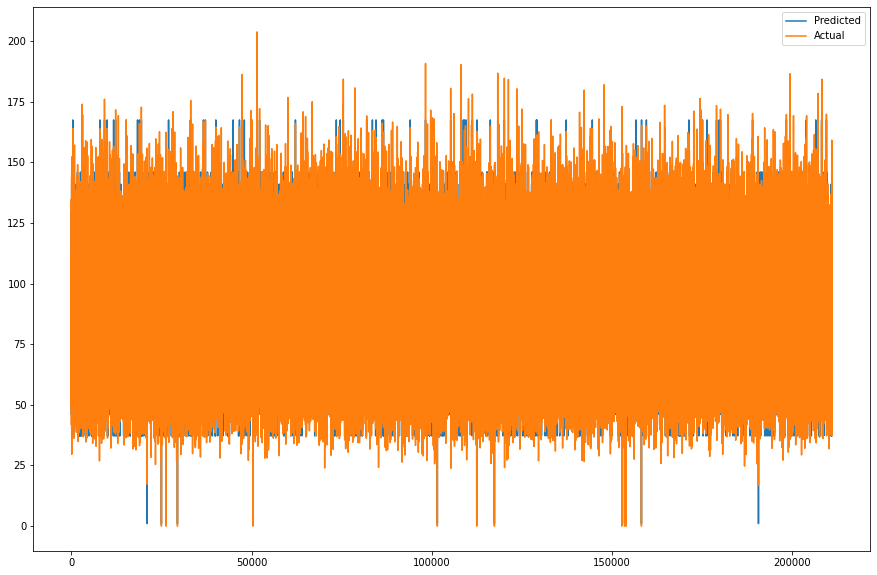

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

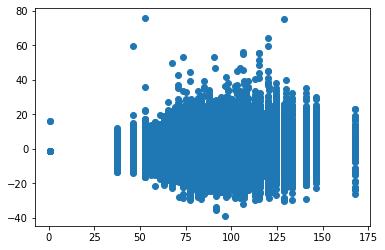

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

##RANDOM FOREST

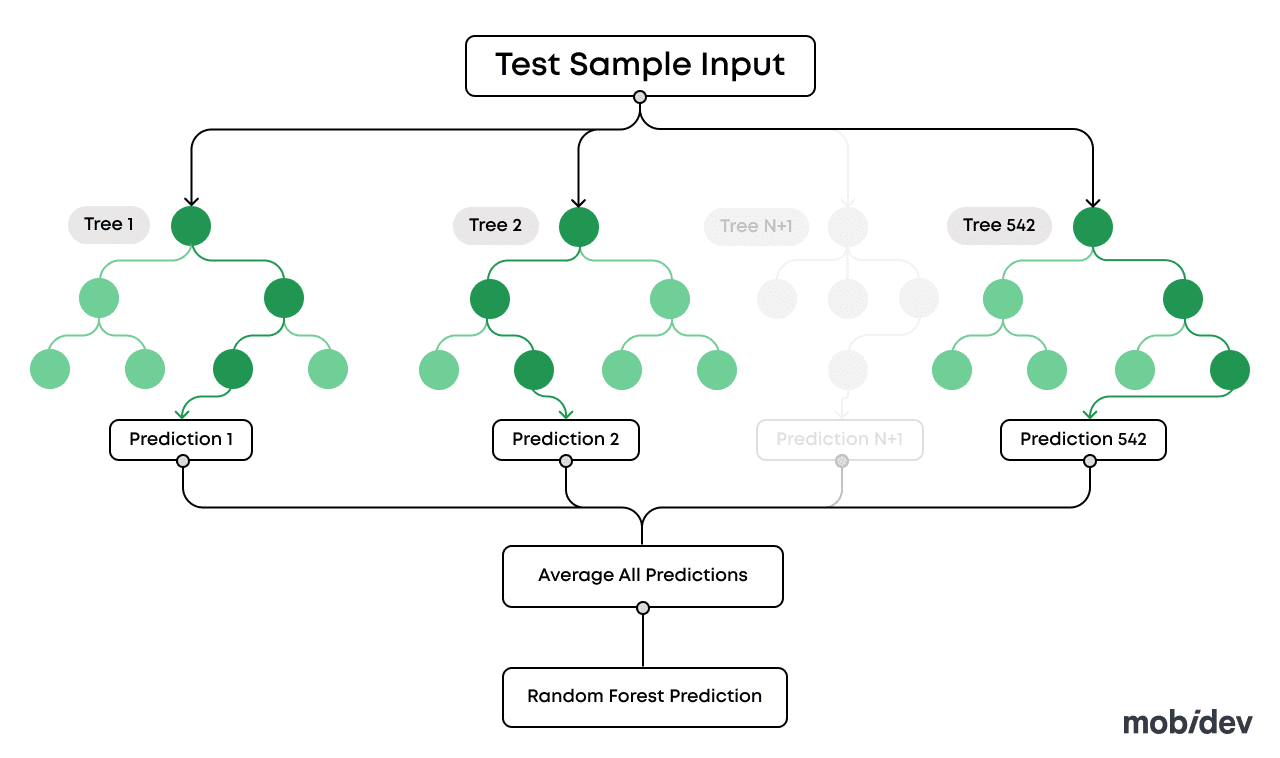

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50,max_depth=15)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=50)

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9610248152637217
MSE : 11.907222347523065
RMSE : 3.4506843303210255
MAE : 2.559175739692221
R2 : 0.9610248152637217
Adjusted R2 : 0.9610017226348798


Looks like our r2 score value is 0.96 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 13.825271636857405
RMSE : 3.7182350163562017
MAE : 2.755382587730081
R2 : 0.9546284789186014
Adjusted R2 : 0.9546015964880648


The r2_score for the test set is 0.95. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

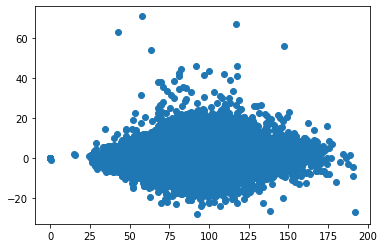

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([1.82846431e-02, 6.71788808e-03, 7.75801651e-01, 3.96512637e-02,
       9.35465916e-05, 3.91512882e-02, 7.62831943e-03, 8.68039011e-03,
       7.61411834e-04, 9.88502402e-03, 1.69224476e-05, 2.56661995e-05,
       9.24720752e-05, 1.84750862e-05, 1.03520915e-05, 1.06538238e-03,
       2.03699988e-03, 8.84662654e-04, 7.42093440e-04, 9.85056893e-04,
       8.36736370e-04, 1.49270567e-03, 1.04490664e-04, 4.03544707e-03,
       1.43497264e-03, 4.92916809e-02, 2.00015667e-02, 2.91416055e-03,
       7.05355436e-04, 1.41969972e-03, 5.62314052e-04, 8.31742048e-05,
       3.73209275e-04, 2.39774945e-05, 2.92642226e-05, 3.31296942e-05,
       3.13490732e-05, 4.42237649e-05, 5.78861771e-05, 3.69564383e-05,
       2.53991028e-05, 4.19239766e-05, 3.15031159e-05, 1.38917509e-03,
       4.33051693e-05, 2.59329258e-05, 2.20371254e-05, 2.11828299e-05,
       2.67170414e-05, 1.62944152e-05, 1.71585044e-05, 1.75460644e-05,
       1.66093542e-05, 1.92117041e-05, 2.04444508e-05, 1.49279872e-05,
      

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
2,Customers,0.78
25,StoreType_d,0.05
3,Promo,0.04
5,CompetitionDistance,0.04
0,Store,0.02
...,...,...
42,Month_11,0.00
41,Month_10,0.00
40,Month_9,0.00
39,Month_8,0.00


In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

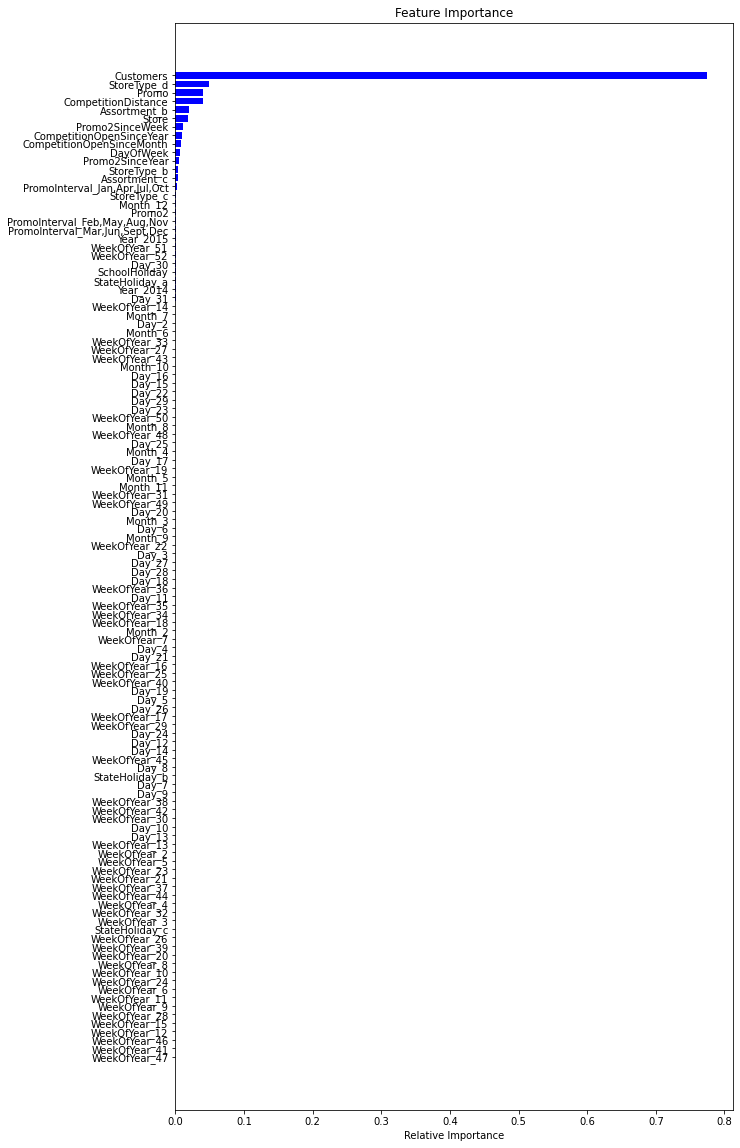

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##GRADIENT BOOSTING

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.892241248557284
MSE : 32.9211374366
RMSE : 5.737694435624818
MAE : 4.473589414186537
R2 : 0.892241248557284
Adjusted R2 : 0.8921779130348291


Looks like our r2 score value is 0.89 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 32.74567494212779
RMSE : 5.722383676592107
MAE : 4.467254023034908
R2 : 0.8925358488436113
Adjusted R2 : 0.8924726864733392


The r2_score for the test set is 0.89. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

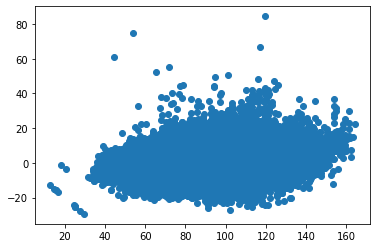

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [ ]:
gb_model.feature_importances_

array([1.64143075e-03, 8.51375012e-03, 8.20705797e-01, 4.77669144e-02,
       9.83222902e-06, 2.78655578e-02, 4.97240629e-04, 7.52027140e-04,
       1.22098979e-03, 6.86282463e-03, 1.43040867e-03, 0.00000000e+00,
       9.15481325e-07, 0.00000000e+00, 0.00000000e+00, 1.65842539e-04,
       6.95977575e-03, 2.60756778e-04, 4.51745057e-02, 0.00000000e+00,
       1.51644363e-02, 4.73283074e-03, 2.87401138e-04, 0.00000000e+00,
       7.31495947e-04, 0.00000000e+00, 3.66656093e-04, 0.00000000e+00,
       1.42903492e-03, 8.39194225e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.72755848e-06, 3.94889136e-05, 0.00000000e+00, 1.64621768e-05,
       4.07291575e-03, 3.02357797e-05, 4.76977711e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Store,0.00
1,DayOfWeek,0.01
2,Customers,0.82
3,Promo,0.05
4,SchoolHoliday,0.00


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
2,Customers,0.82
18,StoreType_d,0.05
3,Promo,0.05
5,CompetitionDistance,0.03
20,Assortment_b,0.02
...,...,...
41,Day_1,0.00
40,Month_12,0.00
39,Month_11,0.00
38,Month_10,0.00


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

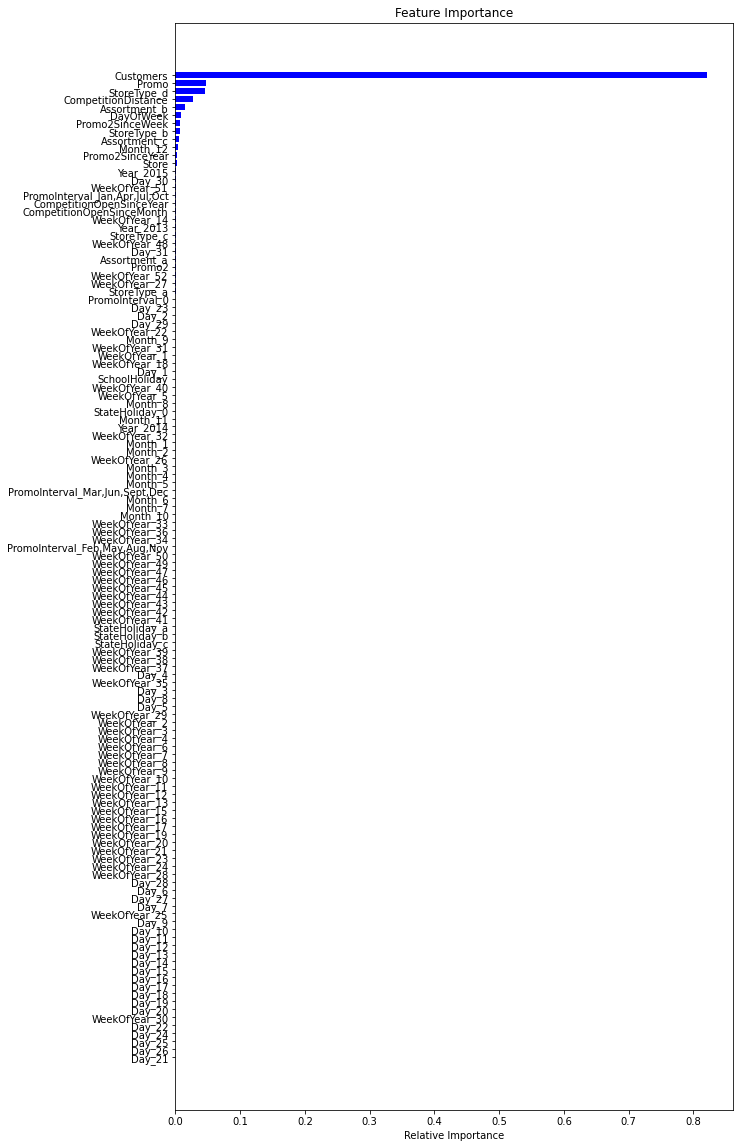

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

##Hyperparameter tuning

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

***Using GridSearchCV***

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

***Gradient Boosting Regressor with GridSearchCV***

**Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [10,40]

# Maximum depth of trees
max_depth = [4,6]

# Minimum number of samples required to split a node
min_samples_split = [20,50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,30]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [10, 40],
 'max_depth': [4, 6],
 'min_samples_split': [20, 50],
 'min_samples_leaf': [10, 30]}

**Importing Gradient Boosting Regressor**

In [ ]:
n_estimators=50,max_depth=15

In [ ]:
gb_grid.best_estimator_

AttributeError: ignored

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 3, 'max_features': 13}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)

from sklearn.metrics import mean_absolute_error
MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.33005093778870387
MSE : 204.6746538660848
RMSE : 14.306454972007733
MAE : 10.789854308871114
R2 : 0.33005093778870387
Adjusted R2 : 0.32965717326094823


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


from sklearn.metrics import mean_absolute_error
MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
gb_optimal_model.feature_importances_

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
gb_model.fit(X_train,y_train)

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

##**SHAP: Shapley Additive Explanations**

SHAP (Shapley Additive exPlanations) is the extension of the Shapley value, a game theory concept introduced in 1953 by mathematician and economist Lloyd Shapley. SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. The concept is a mathematical solution for a game theory problem – how to share a reward among team members in a cooperative game?

Shapley's value assumes that we can compute the value of the surplus with or without each analyzed factor. The algorithm estimates the value of each factor by assessing the values of its ‘coalitions’. In the case of Machine Learning, the ‘surplus’ is a result of our algorithm and co-operators are different input values. The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

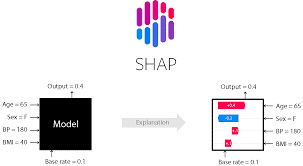

The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. Each feature value is a force that either increases or decreases the prediction. Each feature contributing to pushing the model output from the base value to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

##**SHAP Implementation**

In [82]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 21.1 MB/s 


In [83]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import shap 
import graphviz
sns.set_style('darkgrid') 

In [84]:
categorical_features

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [ ]:
numerical_features

['Store', 'Sales', 'Customers', 'CompetitionDistance']

In [85]:
X_train1=pd.DataFrame(X_train, columns=['CompetitionDistance','StateHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'Year','Month', 'Day', 'WeekOfYear'])
X_test=pd.DataFrame(X_test, columns=['CompetitionDistance','StateHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'Year','Month', 'Day', 'WeekOfYear'])
Y_train1=pd.DataFrame(y_train, columns=["Sales"])
Y_test=pd.DataFrame(y_test, columns=["Sales"])

In [ ]:
# Decision Tree Classifier
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(X_train1, Y_train1)
# Predicting the Test set results
y_pred= classifier_dtc.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(Y_test,y_pred)
print("classification report :", clf_rpt)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True)

ValueError: ignored

In [ ]:
# Visualize how model classified the entire data
tree_graph = export_graphviz(classifier_dtc, out_file=None, feature_names = feature_names, rounded=True, filled=True)
graphviz.Source(tree_graph)

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(classifier_dtc)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0]) 

In [ ]:
X_test.iloc[0]

In [ ]:
X_test.mean()

In [ ]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(classifier_dtc).shap_values(X_test)
shap.summary_plot(shap_values[0], X_test)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***